In [2]:
import mode_analyze
reload(mode_analyze)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
##Setting up models
model=mode_analyze.n3_poly()
ma_3=mode_analyze.ModeAnalyzer(model,'poly_3/poly3.n', n_min=-18, n_max=10, ls=[2,3])

model=mode_analyze.n32_poly()
ma_32=mode_analyze.ModeAnalyzer(model,'poly_32/poly32.n', n_min=0, n_max=10, ls=[2,3])

In [27]:
ns=range(-18, 11)
ls=[2, 3]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_3.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_n3/mode_'+tag, dat,header=header)
            

In [28]:
ns=range(0, 11)
ls=[2, 3]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_32.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_n32/mode_'+tag, dat,header=header)

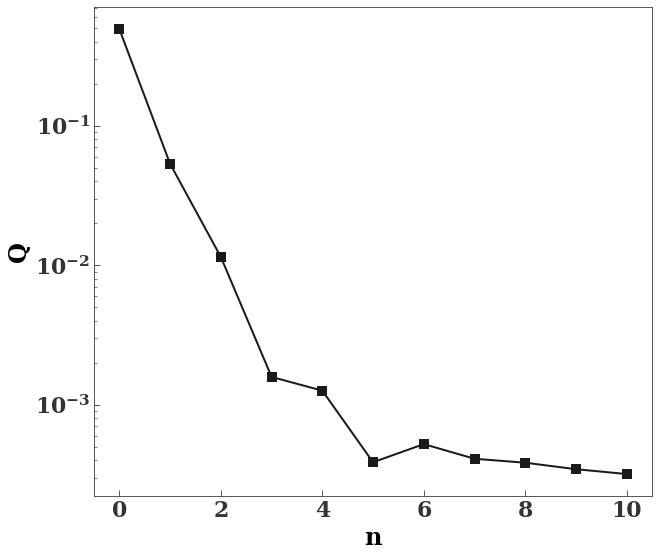

In [29]:
from astropy.table import Table

ns=range(0, 11)
ls=[2]
mode_summary_n32=np.empty([len(ns)*len(ls), 4])
fig,ax=plt.subplots(figsize=(10,9))
ax.set_xlabel('n')
ax.set_ylabel('Q')

idx=0
for ll in ls:
    for nn in ns:
        mode=ma_32.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n32[idx]=nn, ll, mode['omega'], mode['Q']
        idx+=1
 
mode_summary_n32=Table(mode_summary_n32)
semilogy(mode_summary_n32['col0'],mode_summary_n32['col3'], 's-')

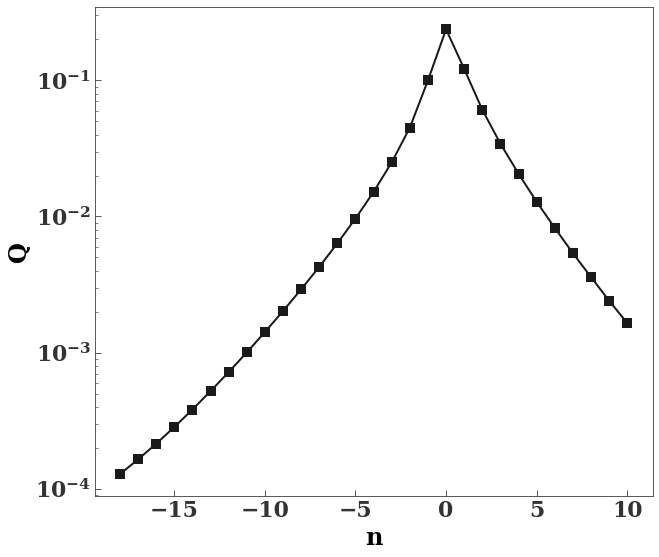

In [30]:
from astropy.table import Table

ns=range(-18, 11)
ls=[2]
mode_summary_n3=np.empty([len(ns)*len(ls), 4])
fig,ax=plt.subplots(figsize=(10,9))
ax.set_xlabel('n')
ax.set_ylabel('Q')

idx=0
for ll in ls:
    for nn in ns:
        mode=ma_3.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n3[idx]=nn, ll, mode['omega'], mode['Q']
        idx+=1
 
mode_summary_n3=Table(mode_summary_n3)
semilogy(mode_summary_n3['col0'],mode_summary_n3['col3'], 's-')

In [34]:
##Tidal coupling constant
Ts_3=ma_3.tidal_coupling(2)
Ts_32=ma_32.tidal_coupling(2)

In [35]:
Ts_3_l3=ma_3.tidal_coupling(3)
Ts_32_l3=ma_32.tidal_coupling(3)

Populating the interactive namespace from numpy and matplotlib


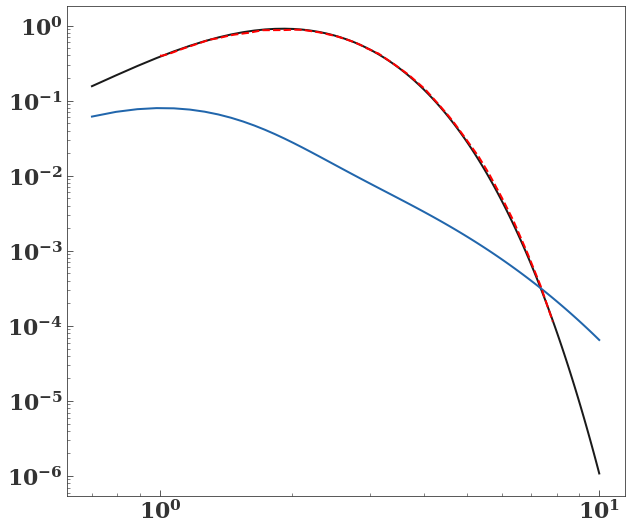

In [36]:
%pylab inline
fig,ax=plt.subplots(figsize=(10,9))

dat=np.genfromtxt('coupling_n32.csv',delimiter=',')
order=np.argsort(dat[:,0])

loglog(ma_32.etas, Ts_32)
loglog(ma_3.etas, Ts_3)
loglog(dat[:,0][order], dat[:,1][order], 'r--')


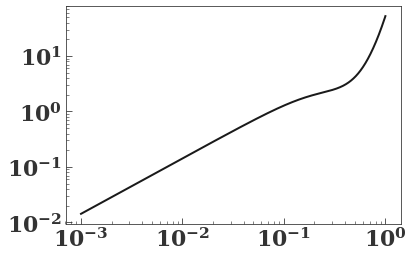

In [14]:
loglog(ma_3.modes_dict['0_2']['xs'], abs(ma_3.modes_dict['0_2']['xi_r']))

Populating the interactive namespace from numpy and matplotlib


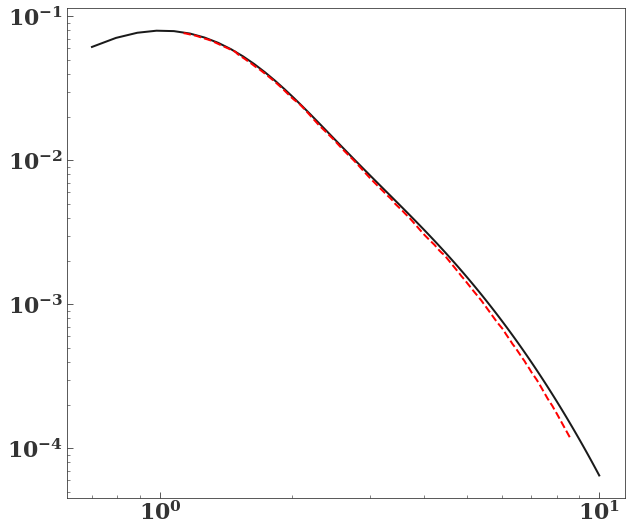

In [6]:
%pylab inline
fig,ax=plt.subplots(figsize=(10,9))

dat=np.genfromtxt('coupling_n3.csv',delimiter=',')
order=np.argsort(dat[:,0])

loglog(ma_3.etas, Ts_3)
loglog(dat[:,0][order], dat[:,1][order], 'r--')

In [87]:
from scipy.interpolate import interp1d

def phi(x):
    return 2.*np.arctan(x)

def t(x):
    return x+x**3./3.

xs=np.linspace(-1000, 1000, 100)
m=2.
l=2.
t1=t(xs)

tords=np.linspace(-1000, 1000, 500)
xords=interp1d(t1, xs)(tords)

out=np.fft.fft((1./(1+xords**2.))**(l+1.)*np.exp(phi(xords)*m*1.0j))

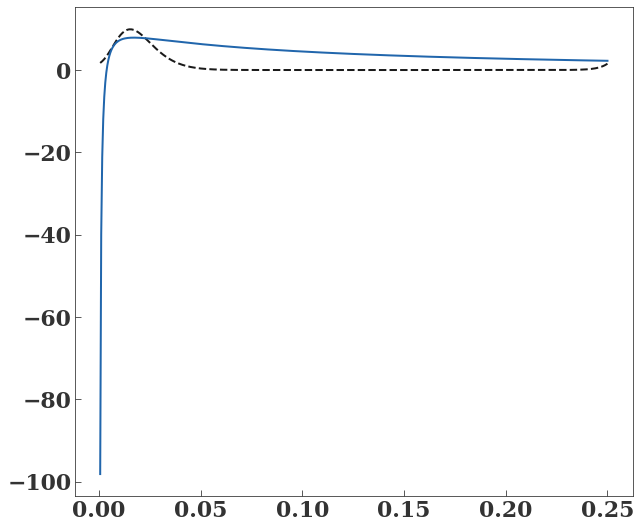

In [97]:
fig,ax=plt.subplots(figsize=(10,9))

nu_min=1./(2.0e3)
nus=np.linspace(nu_min, len(tords)*nu_min, len(tords))
Is=mode_analyze.I2(nus, l, m)
plot(nus, (real(out)**2+imag(out)**2.)**0.5, '--')
plot(nus, 40*Is/nus)



In [ ]:
Is